# Linear Classifier 線性分類器

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br />This work by <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">黃鼎勳</span> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.

### Overview
描述 Linear Classifier 的目的。

給定兩群正負對比且向量化的資料 A 與 B  
其中 A 裡面的每筆資料都為以下形式  
$(x_{1},x_{2},...,x_{m},1)$  
而 B 裡面的每筆資料都為以下形式  
$(x_{1},x_{2},...,x_{m},-1)$。  

目的是找到一個通過原點的超平面 $h:z_{1}x_{1}+z_{2}x_{2}+\cdots+z_{m}x_{m}=0$ 且其法向量為 $\mathbf{v}=(z_{1},z_{2},...,z_{m})$，使得 $A,B$ 兩群資料被一分為二。
![Linear classifier](linear_classifier.png 'Linear classifier')

### Algorithm
假設有兩群正負對比的資料，每筆資料有 $m$ 個不同屬性的類型和 $1$ 個判斷正負的類型。  
輸入 $n$ 筆資料 $[(\mathbf{x}_{1},y_{1}),(\mathbf{x}_{2},y_{2}),\ldots,(\mathbf{x}_{n},y_{n})], \mathbf{x}_{i} \in \mathbb{R}^{m} \text{ and } y_{i} \in \{-1,1\} \text{ for } i=1,2,\ldots,n$。  
如果資料為正，則 $y_{i}=1$。如果資料為負，則 $y_{i}=-1$。  
輸出 $\mathbf{v}$ 使得
$\begin{cases}
\mathbf{v} \cdot \mathbf{x}_{i} > 0 & \text{, if } y_{i}=1 \\
\mathbf{v} \cdot \mathbf{x}_{i} < 0 & \text{, if } y_{i}=-1
\end{cases} \text{ for } i=1,2,\ldots,m$。  
1. 初始值 $\mathbf{v_{0}} = \mathbf{0}$  
2. 找出錯誤 : $\text{sign}(\mathbf{v_{k}} \cdot \mathbf{x}_{i}) \neq y_{i}$

    修正錯誤 : $\mathbf{v_{k+1}}=\mathbf{v_{k}} + y_{i}\mathbf{x}_{i}$。  
3. 重複第 2 步驟直到沒有任何錯誤。

### Explanation
假設有一個超平面區分開兩筆資料，且超平面為 $y = \mathbf{v}$。  
且 $\mathbf{v}$ 經過上述演算法後，會在正號資料的那一區，  
使得正號資料跟 $\mathbf{v}$ 內積為正，負號資料跟 $\mathbf{v}$ 內積為負。

之後如有資料 $\mathbf{x} \in \mathbb{R}^{m}$ 輸入，  
則
$\begin{cases}
\mathbf{v} \cdot \mathbf{x} > 0 & \text{, then } y = 1  \text{, 歸類在正號區。}\\
\mathbf{v} \cdot \mathbf{x} < 0 & \text{, then } y = -1 \text{, 歸類在負號區。}
\end{cases}$

### Convergence of Linear Classifier
假設存在一個法向量 $\mathbf{v}$ 能夠將資料分成兩群，那必定會在有限的次數內找到 $\mathbf{v}$ 。

Proof : 

Suppose $|\mathbf{v}|=1$, $R = \max|\textbf{x}_{i}|$, $\alpha = \min|\mathbf{v} \cdot \mathbf{x}_{t}|$ and $\mathbf{v}_{1}=\mathbf{0}$.

Let $\mathbf{v}_{k} = \mathbf{v}_{k-1}+y_{t}\mathbf{x}_{t}$.  

We note that $\mathbf{x}_t$ is chosen because $\mathbf{v}_{k-1}$ failed to classify $\mathbf{x}_t$.  
That is, $\mathbf{v}_{k-1}\cdot \mathbf{x}_t$ and $y_t$ has opposite signs.  
Equivalently, $\mathbf{v}_{k-1}\cdot y_t\mathbf{x}_t<0$.

(1) 

$\mathbf{v}_{k}\cdot \mathbf{v} = (\mathbf{v}_{k-1}+y_{t}\mathbf{x}_{t})\mathbf{v} \geq \mathbf{v}_{k-1}\cdot\mathbf{v}+\alpha = (\mathbf{v}_{k-2}+y_{t}\mathbf{x}_{t})\mathbf{v}+\alpha \geq \mathbf{v}_{k-2}\cdot\mathbf{v}+2\alpha \geq \cdots \geq k\alpha$

$\Longrightarrow \mathbf{v_{k}}\cdot \mathbf{v} \geq k\alpha$

(2)

$\begin{aligned}
\|\mathbf{v}_{k}\|^{2} & = \|\mathbf{v}_{k-1}+y_{t}\mathbf{x}_{t}\|^{2} \\
 & = \|\mathbf{v}_{k-1}\|^{2}+2(\mathbf{v}_{k-1}\cdot y_{t}\mathbf{x}_{t})+\|\mathbf{x}_{t}\|^{2} \\
 & \leq \|\mathbf{v}_{k-1}\|^{2}+\|\mathbf{x}_{t}\|^{2} \\
 & \leq \|\mathbf{v}_{k-1}\|^{2}+R^{2} \leq \cdots \leq kR^{2}
\end{aligned}$

$\Longrightarrow \|\mathbf{v}_{k}\|^{2} \leq kR^{2}$

From (1)(2), by Cauchy–Schwarz inequality

$k\alpha \leq \mathbf{v}_{k}\cdot \mathbf{v} \leq \|\mathbf{v}_{k}\| \|\mathbf{v}\| \leq \sqrt{kR^{2}}$

$\Longrightarrow k\alpha \leq \sqrt{k}R$

$\Longrightarrow k \leq \frac{\displaystyle R^{2}}{\displaystyle \alpha^{2}}$

### Implementation

In [1]:
def discriminate(data, v):
    for i in data:
        tmp = i[0]*v[0] + i[1]*v[1]
        if (tmp*i[2])<=0:
            return [v[0] + i[2]*i[0], v[1] + i[2]*i[1]]
    else:
        return v

def linear_classifier(data):
    """
    Input:
        data: a list of pairs [(x1,y1,k), ..., (xN,yN,k)], k={-1,+1}
    Output:
        Output v so that the line v = a (xi,yi)
    """
    v = [0,0]

    while(v != discriminate(data, v)):
        v = discriminate(data, v)
    return v

### Examples 1.

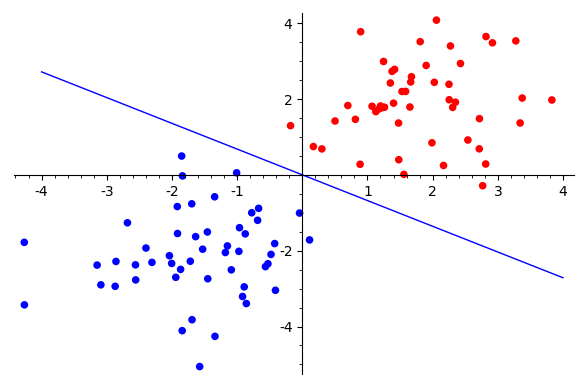

In [5]:
import numpy as np

n = 50
x1 = np.random.randn(n) + 2
y1 = np.random.randn(n) + 2
data1 = zip(x1,y1)
p = point(data1, rgbcolor='red', size=30)

x2 = np.random.randn(n) - 2
y2 = np.random.randn(n) - 2
data2 = zip(x2,y2)
q = point(data2, rgbcolor='blue', size=30)

data = zip(x1, y1, [1]*n) + zip(x2, y2, [-1]*n)
#print data
v = linear_classifier(data)
x = var('x')
g = -(v[0]/v[1])*x
pic = g.plot(xmin=-4,xmax=4)

f=p+q+pic
f.show()

### Examples 2.

[(170, 73, 1), (165, 68, 1), (173, 78, 1), (176, 80, 1), (180, 90, 1), (180, 87, 1), (179, 79, 1), (168, 69, 1), (177, 76, 1), (183, 93, 1), (175, 65, -1), (166, 60, -1), (171, 63, -1), (178, 65, -1), (182, 71, -1), (170, 61, -1), (185, 73, -1), (170, 59, -1), (172, 58, -1), (176, 61, -1)]
身高
170
體重
68
身高
175
體重
70


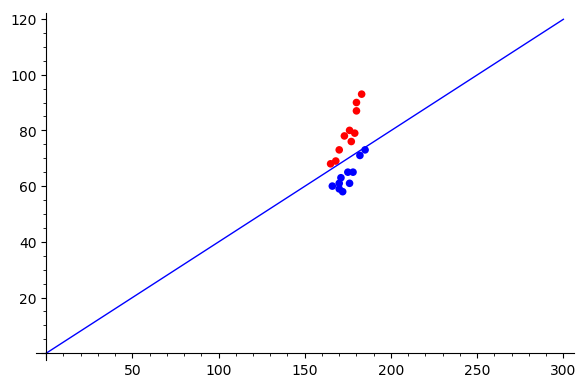

In [6]:
import numpy as np

n=10
x1 = [170,165,173,176,180,180,179,168,177,183]
y1 = [73,68,78,80,90,87,79,69,76,93]
data1 = zip(x1,y1)
p = point(data1, rgbcolor='red', size=30)

x2 = [175,166,171,178,182,170,185,170,172,176]
y2 = [65,60,63,65,71,61,73,59,58,61]
data2 = zip(x2,y2)
q = point(data2, rgbcolor='blue', size=30)

data = zip(x1, y1, [1]*n) + zip(x2, y2, [-1]*n)
print data
v = linear_classifier(data)
print '身高'
print 170
print '體重'
print ceil(-170*v[0]/v[1])
print '身高'
print 175
print '體重'
print ceil(-175*v[0]/v[1])
x = var('x')
g = -(v[0]/v[1])*x
pic = g.plot(xmin=0,xmax=300)

f=p+q+pic
f.show()